Here is an exercise I am doing right now. If anyone wants to join me we can go over the results on the weekend.
Here we have air pollution data for the city I currently live at - Skopje.
The measurements go back ~10 years and include  6 measuring stations. The measurements are taken every hour but there is a lot of missing data and some station are just active the last few years.
Higher ratings mean worse air quality.
Anything over 50 is considered not good. Anything over 200 is considered hazardous.
Let's try to answer the following questions for the last 5 winters, a winter being the period from November including February. We are looking at the years 2013/14 until 2017/18.
- Which have been the top 3 worst months overall?
- Which measuring station has the highest ratings on average?
- Make a pie chart with the average rating for each station
- Which is the worst month per measuring station on average? Is it the same for them all?
- Make a pie chart showing how many days in total the measurements has been over 50 for each station in the whole period. Same chart for over 200.
You will have to do some data cleaning and aggregation (from hourly to daily/monthly).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('pm10_data.csv')
print(df.shape)
df.head()

(92246, 7)


,A,B,C,D,E,G,time
0,NaN,NaN,NaN,NaN,NaN,120.26,2008-01-01 00:00:00
1,NaN,NaN,124.84,99.12,NaN,130.95,2008-01-01 01:00:00
2,NaN,NaN,107.64,98.37,NaN,130.19,2008-01-01 02:00:00
3,NaN,NaN,107.80,89.33,NaN,121.46,2008-01-01 03:00:00
4,NaN,NaN,100.65,94.35,NaN,103.99,2008-01-01 04:00:00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92246 entries, 0 to 92245
Data columns (total 7 columns):
A       55670 non-null float64
B       50826 non-null float64
C       64273 non-null float64
D       82896 non-null float64
E       65715 non-null float64
G       76992 non-null float64
time    92246 non-null object
dtypes: float64(6), object(1)
memory usage: 4.9+ MB


In [4]:
df.isnull().sum()

A       36576
B       41420
C       27973
D        9350
E       26531
G       15254
time        0
dtype: int64

In [5]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

A       39.650500
B       44.901676
C       30.324350
D       10.135941
E       28.761139
G       16.536218
time     0.000000
dtype: float64

In [6]:
df.describe()

,A,B,C,D,E,G
count,55670.000000,50826.000000,64273.000000,82896.000000,65715.000000,76992.000000
mean,72.715512,80.485886,67.513649,94.647895,50.960180,76.967020
std,78.001704,89.496704,75.114049,116.532024,51.317925,83.102787
min,0.000000,0.060000,0.000000,0.010000,0.053400,0.000000
25%,30.896075,27.490000,26.367200,31.514150,22.420000,29.470000
50%,45.912900,55.434950,42.420900,54.200000,35.360000,51.150000
75%,81.783725,99.607500,77.402000,105.622500,59.261950,91.870000
max,1093.080000,996.758000,1218.630000,994.319000,726.920000,997.229000


In [7]:
# Make columns for year and month
df['time'] = pd.to_datetime(df.time)
df['year'] = df.time.dt.year
df['month'] = df.time.dt.month
df['day'] = df.time.dt.hour
df['hour'] = df.time.dt.hour

# Drop the time column
df.drop('time', axis=1, inplace=True)
df.head()

,A,B,C,D,E,G,year,month,day,hour
0,NaN,NaN,NaN,NaN,NaN,120.26,2008,1,0,0
1,NaN,NaN,124.84,99.12,NaN,130.95,2008,1,1,1
2,NaN,NaN,107.64,98.37,NaN,130.19,2008,1,2,2
3,NaN,NaN,107.80,89.33,NaN,121.46,2008,1,3,3
4,NaN,NaN,100.65,94.35,NaN,103.99,2008,1,4,4


In [8]:
reshape_df = pd.melt(df, id_vars = ['year', 'month', 'day', 'hour'],
               value_vars = ['A', 'B', 'C', 'D', 'E', 'F', 'G'],
               var_name = 'sectors')

C:\Users\Jones\Anaconda3\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [9]:
reshape_df.sort_values('value', ascending=False).head()

,year,month,day,hour,sectors,value
266873,2017,2,22,22,C,1218.63
266874,2017,2,23,23,C,1113.36
266872,2017,2,21,21,C,1105.87
54091,2013,12,1,1,A,1093.08
266875,2017,2,0,0,C,1071.15


The top 5 worst index values from sectors in year, month, day, hour

In [10]:
reshape_df.sort_values('value', ascending=False).head(50).month.value_counts()

12    32
10     7
2      5
11     4
1      2
Name: month, dtype: int64

The top 3 worst month overall from top 50 worst index values

In [11]:
reshape_df.loc[reshape_df.value.notna()].pivot_table(index='sectors',
                                                    values='value',
                                                    aggfunc=np.mean).sort_values('value', ascending=False)

,value
sectors,
D,94.647895
B,80.485886
G,76.967020
A,72.715512
C,67.513649
E,50.960180


The highest ratings on average is sector D

Text(0.5, 1.0, 'Average rating for each station')

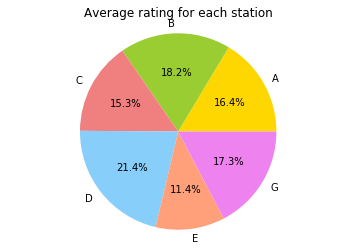

In [12]:
average_each_station = reshape_df.loc[reshape_df.value.notna()].pivot_table(index='sectors',
                                                    values='value',
                                                    aggfunc=np.mean)
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightsalmon', 'violet']
fig, ax = plt.subplots()
ax.pie(average_each_station.value.astype('int32'), labels=average_each_station.index, autopct='%1.1f%%', colors=colors)
plt.axis('equal')
plt.title('Average rating for each station')

In [13]:
reshape_df.loc[reshape_df.value.notna()].pivot_table(index=['sectors', 'month'],
                                                    values='value',
                                                    aggfunc=np.mean).sort_values('value', ascending=False).head(20)

value
sectors month            
D       12     215.678519
        1      183.675070
        11     165.698805
A       12     163.774424
B       12     155.390750
C       12     153.020012
G       12     149.625671
        1      147.126292
B       1      142.780938
A       1      132.681498
D       2      128.685839
C       1      124.740618
B       11     111.816451
G       11     111.446674
A       11     105.008174
C       11     101.447115
G       2       98.667196
E       1       93.905443
B       2       92.262979
E       12      86.992091

Sector D in the month of 12 is the worst measuring on average

Text(0.5, 1.0, 'Days in total of over 50 for each station')

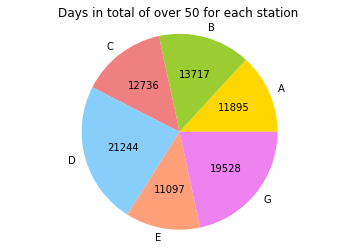

In [14]:
total_hourly = reshape_df.loc[reshape_df.value > 50, ['hour', 'sectors', 'value']].pivot_table(index='sectors', values='hour', aggfunc=np.sum)
total_hourly['days'] = total_hourly.hour / 24
total_hourly
total = sum(total_hourly.days)
fig, ax = plt.subplots()
ax.pie(total_hourly.days.astype('int32'), labels=total_hourly.index, colors=colors, autopct=lambda p: '{:.0f}'.format(p * total / 100))
plt.axis('equal')
plt.title('Days in total of over 50 for each station')

Text(0.5, 1.0, 'Days in total of over 200 for each station')

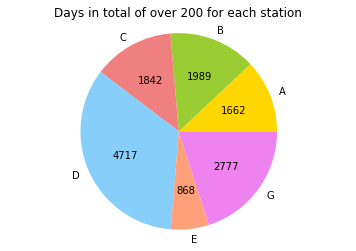

In [15]:
total_hourly = reshape_df.loc[reshape_df.value > 200, ['hour', 'sectors', 'value']].pivot_table(index='sectors', values='hour', aggfunc=np.sum)
total_hourly['days'] = total_hourly.hour / 24
total_hourly
total = sum(total_hourly.days)
fig, ax = plt.subplots()
ax.pie(total_hourly.days.astype('int32'), labels=total_hourly.index, colors=colors, autopct=lambda p: '{:.0f}'.format(p * total / 100))
plt.axis('equal')
plt.title('Days in total of over 200 for each station')